In [113]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
import motiflets.plotting as ml_plt

import subprocess
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
df = pd.concat([df1, df2, df3, df4])
df.reset_index(inplace=True, drop=True)
df

,Dataset,Method,Precision,Recall
0,Boxing,mSTAMP+MDL,1.000000,0.2
1,Boxing,mSTAMP,1.000000,0.2
2,Boxing,LAMA,0.900000,0.9
3,Boxing,EMD*,0.800000,0.8
4,Boxing,K-Motifs (TOP-f),0.700000,0.7
...,...,...,...,...
61,Queen David Bowie - Under Pressure,mSTAMP,1.000000,1.0
62,Queen David Bowie - Under Pressure,LAMA,0.375000,1.0
63,Queen David Bowie - Under Pressure,EMD*,0.437500,1.0
64,Queen David Bowie - Under Pressure,K-Motifs (TOP-f),0.375000,1.0


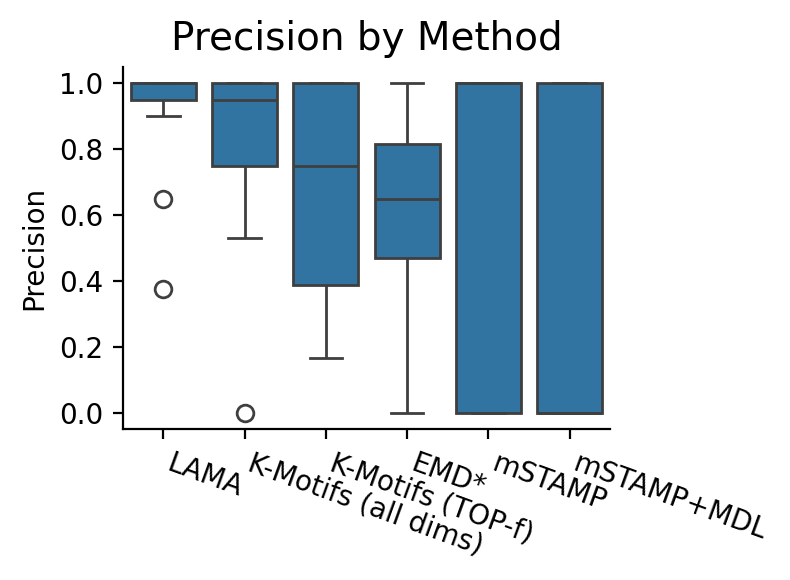

In [115]:
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_precision.pdf")

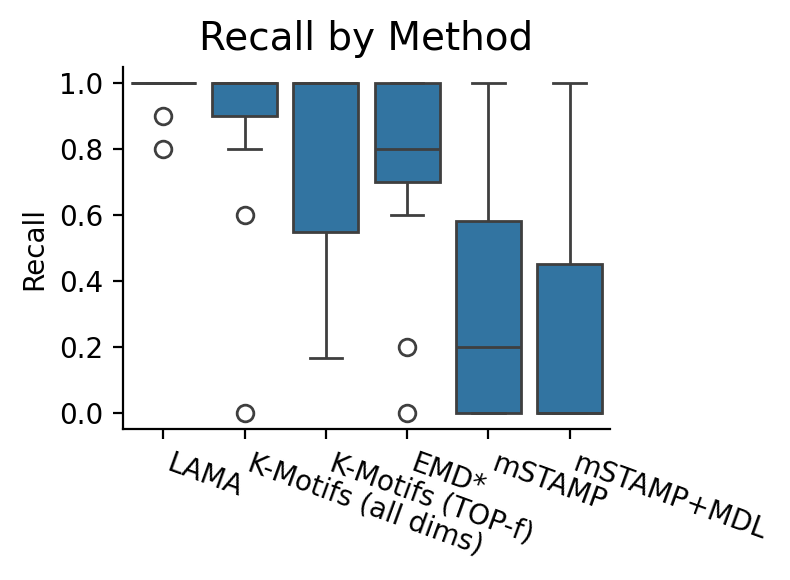

In [116]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_recall.pdf")

In [135]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 0.620076 & 0.650000 & 0.745455 & 0.800000 \\
K-Motifs (TOP-f) & 0.685606 & 0.750000 & 0.769697 & 1.000000 \\
K-Motifs (all dims) & 0.801159 & 0.950000 & 0.854545 & 1.000000 \\
LAMA & 0.902273 & 1.000000 & 0.972727 & 1.000000 \\
mSTAMP & 0.545455 & 1.000000 & 0.342424 & 0.200000 \\
mSTAMP+MDL & 0.454545 & 0.000000 & 0.251515 & 0.000000 \\
\bottomrule
\end{tabular}



In [110]:
datasets = ["common-starling-sturnus-vulgaris.csv",
"Lord-of-the-Rings-Symphony-The-Shire.csv",
"Star_Wars_The_Imperial_March_Theme_Song.csv",
"The-Rolling-Stones-Paint-It-Black.csv",
"Numb-Linkin-Park.csv",
"Queen-David-Bowie-Under-Pressure.csv",
"Vanilla_Ice-Ice_Ice_Baby.csv",
"What-I-ve-Done-Linkin-Park.csv"]

In [111]:
for d in datasets:
    df2 = pd.read_csv("../datasets/audio/"+d, index_col=0, compression='gzip')
    print(d, df2.shape)

common-starling-sturnus-vulgaris.csv (20, 2839)
Lord-of-the-Rings-Symphony-The-Shire.csv (20, 6487)
Star_Wars_The_Imperial_March_Theme_Song.csv (20, 8015)
The-Rolling-Stones-Paint-It-Black.csv (20, 9744)
Numb-Linkin-Park.csv (20, 8018)
Queen-David-Bowie-Under-Pressure.csv (20, 9305)
Vanilla_Ice-Ice_Ice_Baby.csv (20, 11693)
What-I-ve-Done-Linkin-Park.csv (20, 8932)


AttributeError: 'DataFrame' object has no attribute 'Method'